In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from DataMacpy import *

DataMacpy Setup


# Train Chapter

## Verilerimizi içeri aktaralım

In [2]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'train.csv'

# verimizi okuyoruz. 
df = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


In [3]:
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [4]:
#X.groupby("Öbek İsmi_obek_2").agg({"Cinsiyet_Kadın": "mean"})

In [5]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df['Yaş Grubu'] == '18-30') | (df['Yaş Grubu'] == '31-40'),
    (df['Yaş Grubu'] == '41-50') | (df['Yaş Grubu'] == '51-60'),
    (df['Yaş Grubu'] == '>60')
]
degerler = [
    1,
    2,
    3
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yaş Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [6]:
df["Yaş Durumu"].value_counts()

1    3318
2    1588
3     554
Name: Yaş Durumu, dtype: int64

In [7]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df['Eğitim Düzeyi'] == 'Eğitimsiz') | (df['Eğitim Düzeyi'] == 'İlkokul Mezunu') | (df['Eğitim Düzeyi'] == 'Ortaokul Mezunu'),
    (df['Eğitim Düzeyi'] == 'Lise Mezunu') | (df['Eğitim Düzeyi'] == 'Yüksekokul Mezunu'),
    (df['Eğitim Düzeyi'] == 'Üniversite Mezunu') | (df['Eğitim Düzeyi'] == 'Yüksek Lisans Mezunu'),
    (df['Eğitim Düzeyi'] == 'Doktora Mezunu') | (df['Eğitim Düzeyi'] == 'Doktora Ötesi')
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Eğitim Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [8]:
df["Eğitim Durumu"].value_counts()

2    1976
3    1802
1    1210
4     472
Name: Eğitim Durumu, dtype: int64

In [9]:
kosullar = [
    (df['Yaşadığı Şehir'] == 'Köy veya Kasaba') | (df['Yaşadığı Şehir'] == 'Kırsal'),
    (df['Yaşadığı Şehir'] == 'Küçük Şehir') | (df['Yaşadığı Şehir'] == 'Büyük Şehir'),

]
degerler = [
    1,
    2
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yaşadığı Şehir Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [10]:
df["Yaşadığı Şehir Durumu"].value_counts()

2    3801
1    1659
Name: Yaşadığı Şehir Durumu, dtype: int64

In [11]:
kosullar = [
    (df['Yıllık Ortalama Gelir'] <= 120000),
    (df['Yıllık Ortalama Gelir'] > 120000) & (df['Yıllık Ortalama Gelir'] <= 300000),
    (df['Yıllık Ortalama Gelir'] > 300000) & (df['Yıllık Ortalama Gelir'] <= 500000),
    (df['Yıllık Ortalama Gelir'] > 500000)
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yıllık Ortalama Gelir Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [12]:
df["Yıllık Ortalama Gelir Durumu"].value_counts()

2    2760
3    1841
4     797
1      62
Name: Yıllık Ortalama Gelir Durumu, dtype: int64

In [13]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df['Yıllık Ortalama Satın Alım Miktarı'] <= 8500),
    (df['Yıllık Ortalama Satın Alım Miktarı'] > 8500) & (df['Yıllık Ortalama Satın Alım Miktarı'] <= 20000),
    (df['Yıllık Ortalama Satın Alım Miktarı'] > 20000)
]
degerler = [
    1,
    2,
    3
    
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yıllık Ortalama Satın Alım Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [14]:
df["Yıllık Ortalama Satın Alım Durumu"].value_counts()

1    2746
3    2090
2     624
Name: Yıllık Ortalama Satın Alım Durumu, dtype: int64

In [15]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] <= 5),
    (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] > 5) & (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] <= 35),
    (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] > 35)
]
degerler = [
    1,
    2,
    3
    
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [16]:
df["Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu"].value_counts()

2    3687
3    1397
1     376
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu, dtype: int64

In [17]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 25),
    (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 25) & (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 60),
    (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 60) & (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 100),
    (df['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 100)
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df['Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [18]:
df["Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu"].value_counts()

2    3687
3    1397
1     376
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,5460.0,2729.500000,1576.310566,0.000000,1364.750000,2729.500000,4094.250000,5.459000e+03
Yıllık Ortalama Gelir,5460.0,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1.192437e+06
Yıllık Ortalama Satın Alım Miktarı,5460.0,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,4.860559e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.0,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,6.461620e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.0,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,2.423084e+02


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              5460 non-null   int64  
 1   Cinsiyet                                           5460 non-null   object 
 2   Yaş Grubu                                          5460 non-null   object 
 3   Medeni Durum                                       5460 non-null   object 
 4   Eğitim Düzeyi                                      5460 non-null   object 
 5   İstihdam Durumu                                    5460 non-null   object 
 6   Yıllık Ortalama Gelir                              5460 non-null   float64
 7   Yaşadığı Şehir                                     5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu                      5460 non-null   object 
 9   Yıllık O

In [21]:
df

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,...,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Durumu,Eğitim Durumu,Yaşadığı Şehir Durumu,Yıllık Ortalama Gelir Durumu,Yıllık Ortalama Satın Alım Durumu,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,...,Etmiyor,obek_4,102.936904,1,3,2,4,3,3,4
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,...,Etmiyor,obek_5,82.176053,3,2,2,2,1,2,3
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,...,Ediyor,obek_8,141.661426,1,2,2,2,2,3,4
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,...,Etmiyor,obek_3,17.097397,2,2,1,3,1,2,1
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,...,Etmiyor,obek_3,20.470459,1,1,2,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,...,Etmiyor,obek_6,51.600436,3,3,1,3,3,2,2
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,...,Etmiyor,obek_6,49.190536,2,4,1,3,3,2,2
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,...,Etmiyor,obek_1,9.537384,2,1,2,3,1,2,1
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,...,Ediyor,obek_8,143.281718,1,2,2,2,2,3,4


## Bağımlı Değişken Ayarlayalım.

In [22]:
y_not_enc = df["Öbek İsmi"]
y_not_enc

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5460, dtype: object

In [23]:
# target verilerimiz string olduğu için LabelEncoder yapıyoruz. Her sınıfı bir sayıya atıyoruz.
l_fit = LabelEncoder().fit(y_not_enc)
y = l_fit.transform(y_not_enc)
#y = pd.DataFrame(y, columns = ["Type_1"]) # dataframe'e çevirmek için bu satırı kullanabiliriz.
y[0:20]

array([3, 4, 7, 2, 2, 7, 2, 4, 2, 5, 4, 0, 6, 2, 6, 4, 6, 5, 5, 5])

In [24]:
# labellerimizi buluyoruz.
y_label = l_fit.inverse_transform([i for i in range(max(y)+1)])
label_and_num = list(zip(y_label, [i for i in range(max(y)+1)]))
label_and_num

[('obek_1', 0),
 ('obek_2', 1),
 ('obek_3', 2),
 ('obek_4', 3),
 ('obek_5', 4),
 ('obek_6', 5),
 ('obek_7', 6),
 ('obek_8', 7)]

## Bağımsız Değişkenleri Ayarlayalım

In [25]:
# özniteliklerimizi belirleyelim.
X = df
X.drop(["Öbek İsmi"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Durumu,Eğitim Durumu,Yaşadığı Şehir Durumu,Yıllık Ortalama Gelir Durumu,Yıllık Ortalama Satın Alım Durumu,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904,1,3,2,4,3,3,4
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053,3,2,2,2,1,2,3
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426,1,2,2,2,2,3,4
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397,2,2,1,3,1,2,1
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459,1,1,2,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,51.600436,3,3,1,3,3,2,2
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,49.190536,2,4,1,3,3,2,2
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,9.537384,2,1,2,3,1,2,1
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,143.281718,1,2,2,2,2,3,4


In [26]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 0)
d

{'Cinsiyet': 2,
 'Yaş Grubu': 5,
 'Medeni Durum': 2,
 'Eğitim Düzeyi': 9,
 'İstihdam Durumu': 4,
 'Yaşadığı Şehir': 4,
 'En Çok İlgilendiği Ürün Grubu': 5,
 'Eğitime Devam Etme Durumu': 2,
 'Yaş Durumu': 3,
 'Eğitim Durumu': 4,
 'Yaşadığı Şehir Durumu': 2,
 'Yıllık Ortalama Gelir Durumu': 4,
 'Yıllık Ortalama Satın Alım Durumu': 3,
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu': 3,
 'Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu': 4}

In [27]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Durumu,Eğitim Durumu,Yaşadığı Şehir Durumu,Yıllık Ortalama Gelir Durumu,Yıllık Ortalama Satın Alım Durumu,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0,0,1.0,1.0,0.0,5.0,0.0,748266.440879,0.0,0.0,32010.900881,37.310644,1.0,102.936904,0.0,2.0,1.0,3.0,2.0,2.0,3.0
1,1,0.0,4.0,1.0,3.0,2.0,246298.609605,2.0,4.0,4145.729891,11.554851,1.0,82.176053,2.0,1.0,1.0,1.0,0.0,1.0,2.0
2,2,0.0,0.0,0.0,3.0,0.0,268582.732360,2.0,2.0,9924.379414,55.353236,0.0,141.661426,0.0,1.0,1.0,1.0,1.0,2.0,3.0
3,3,0.0,3.0,1.0,3.0,2.0,327721.837865,3.0,2.0,6417.780714,15.417239,1.0,17.097397,1.0,1.0,0.0,2.0,0.0,1.0,0.0
4,4,0.0,1.0,1.0,4.0,3.0,397431.626948,0.0,2.0,7886.663061,14.689837,1.0,20.470459,0.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,1.0,4.0,0.0,7.0,1.0,478054.247819,1.0,3.0,43182.299801,31.356284,1.0,51.600436,2.0,2.0,0.0,2.0,2.0,1.0,1.0
5456,5456,0.0,3.0,1.0,1.0,2.0,481852.853651,1.0,1.0,42107.996193,26.288620,1.0,49.190536,1.0,3.0,0.0,2.0,2.0,1.0,1.0
5457,5457,1.0,3.0,1.0,8.0,0.0,309443.687351,2.0,1.0,4655.392445,5.156906,1.0,9.537384,1.0,0.0,1.0,2.0,0.0,1.0,0.0
5458,5458,1.0,0.0,0.0,6.0,0.0,266604.268016,0.0,1.0,9016.165906,39.205399,0.0,143.281718,0.0,1.0,1.0,1.0,1.0,2.0,3.0


In [28]:
X.columns

Index(['index', 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yıllık Ortalama Gelir', 'Yaşadığı Şehir',
       'En Çok İlgilendiği Ürün Grubu', 'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu', 'Yıllık Ortalama Sepete Atılan Ürün Adedi',
       'Yaş Durumu', 'Eğitim Durumu', 'Yaşadığı Şehir Durumu',
       'Yıllık Ortalama Gelir Durumu', 'Yıllık Ortalama Satın Alım Durumu',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu',
       'Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu'],
      dtype='object')

In [30]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import lightgbm as lgb

from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

 Toplam Doğruluk: % 81.24485219180359


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.651163,129,84,45,obek_1
1,obek_2,0.758929,112,85,27,obek_2
2,obek_3,0.666667,126,84,42,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.692857,140,97,43,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.884058,138,122,16,obek_8


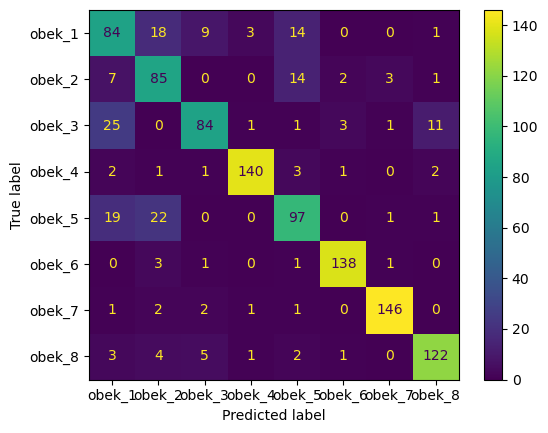

In [34]:
# KNN
model_fit_and_predict(KNeighborsClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 90.5476853110641


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.945736,129,122,7,obek_1
1,obek_2,0.910714,112,102,10,obek_2
2,obek_3,0.888889,126,112,14,obek_3
3,obek_4,0.880000,150,132,18,obek_4
4,obek_5,0.942857,140,132,8,obek_5
5,obek_6,0.888889,144,128,16,obek_6
6,obek_7,0.895425,153,137,16,obek_7
7,obek_8,0.891304,138,123,15,obek_8


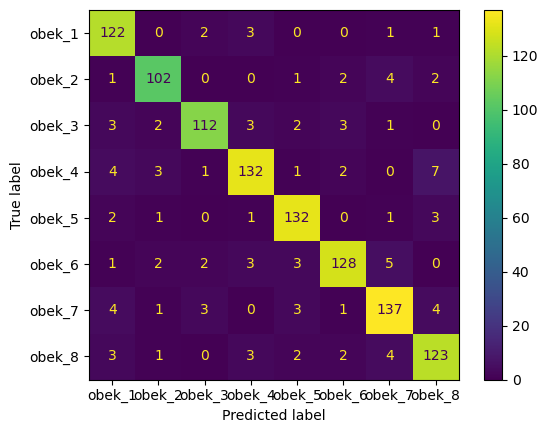

In [35]:
# DecisionTreeClassifier (DTC)
model_fit_and_predict(DecisionTreeClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


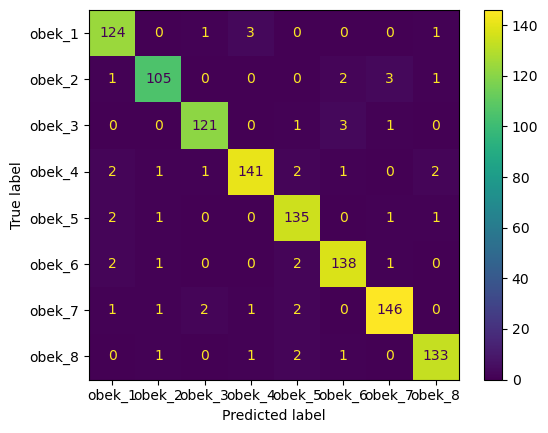

In [36]:
# RandomForestClassifier (RFC)
model_fit_and_predict(RandomForestClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.41283291628078


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


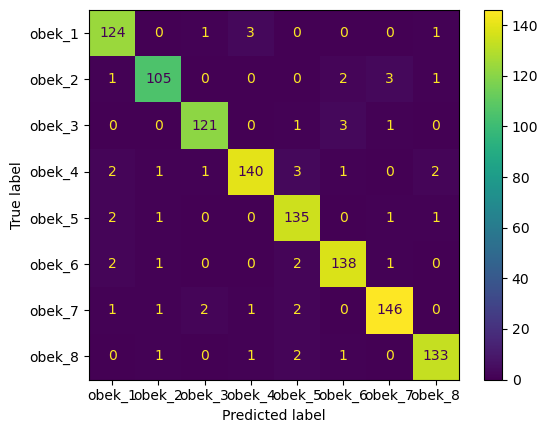

In [37]:
model_fit_and_predict(ExtraTreesClassifier(n_estimators=100), y_label, X_train, y_train, X_valid, y_valid)

[Voting] ....................... (1 of 3) Processing lr, total=  41.8s
[Voting] ....................... (2 of 3) Processing rf, total=   0.6s
[Voting] ...................... (3 of 3) Processing knn, total=   5.0s
 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


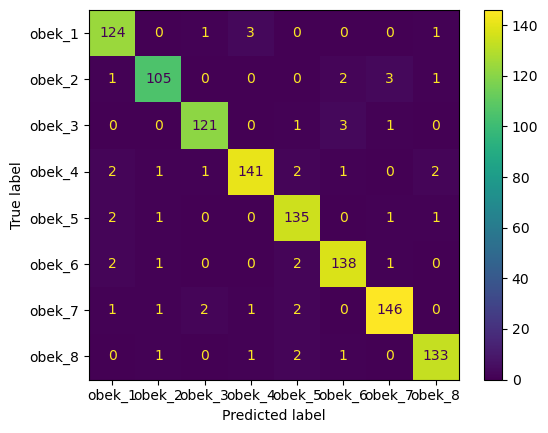

In [38]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier()

clf4 = LGBMClassifier()
clf5 = CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0)

eclf1 = VotingClassifier(estimators=[('lr', clf5), ('rf', clf2), ('knn', clf4)], voting='soft', verbose=True)

model_fit_and_predict(eclf1, y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.41283291628078


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


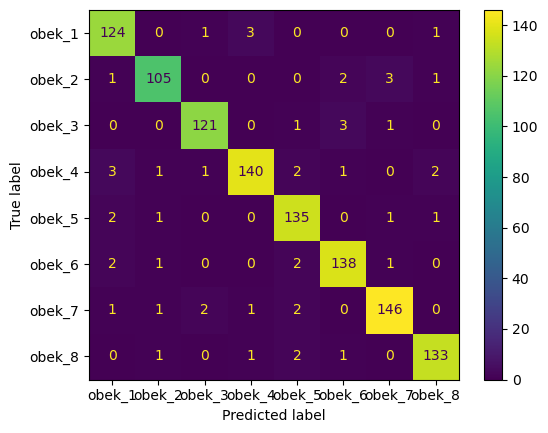

In [39]:
model_fit_and_predict(LGBMClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.32225320613583


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.956522,138,132,6,obek_8


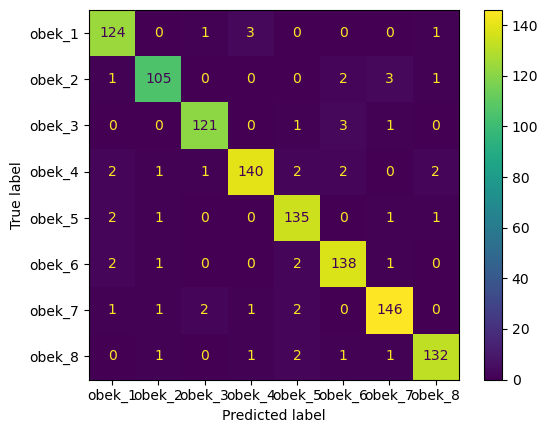

In [40]:
model_fit_and_predict(CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0), y_label, X_train, y_train, X_valid, y_valid)

In [43]:
model_list = [
    
    LogisticRegression(multi_class='multinomial', random_state=1, solver="newton-cg"), # 0
    
    KNeighborsClassifier(n_neighbors=3), # 1
    
    DecisionTreeClassifier(), # 2
    
    RandomForestClassifier(), # 3
    
    ExtraTreesClassifier(), # 4
    
    HistGradientBoostingClassifier(), # 5
    
    VotingClassifier(estimators=[('catb', CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0)),
                                 ('rf', RandomForestClassifier()),
                                 ('lgb', LGBMClassifier())],
                                 voting='soft'), # 6
    
    LGBMClassifier(), # 7
    
    CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0) # 8
    
]

fast_model_select(model_list, X, y)

Model 0 Accuracy: %83.05860805860806
Model 1 Accuracy: %79.7802197802198
Model 2 Accuracy: %73.42490842490844
Model 3 Accuracy: %95.45787545787546
Model 4 Accuracy: %95.42124542124543
Model 5 Accuracy: %92.49084249084248
Model 6 Accuracy: %94.90842490842489
Model 7 Accuracy: %93.003663003663
Model 8 Accuracy: %94.74358974358972


In [63]:
params = {
    "n_estimators" : [75, 100, 150, 200, 250, 500, 1000],
    "min_samples_split" : [1, 3, 5, 7, 10, 15, 20]
}

In [64]:
extc_gscv_model = GridSearchCV( 
    ExtraTreesClassifier(),
    params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X, y)

extc_gscv_model.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'min_samples_split': 3, 'n_estimators': 100}

In [65]:
rf_gscv_model = GridSearchCV( 
    RandomForestClassifier(),
    params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X, y)

rf_gscv_model.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'min_samples_split': 3, 'n_estimators': 200}

In [95]:
lgbm_params = {
    "boosting_type" : ['gbdt', "rf"],
    "num_leaves" : [27, 30, 31, 32, 33],
    "learning_rate" : [0.04, 0.1, 0.07, 0.09]
}

In [96]:
lgbm_gscv_model = GridSearchCV( 
    LGBMClassifier(),
    lgbm_params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X, y)

lgbm_gscv_model.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'boosting_type': 'gbdt', 'learning_rate': 0.07, 'num_leaves': 33}

In [98]:
model_list2 = [
    
    ExtraTreesClassifier(**extc_gscv_model.best_params_),
    
    RandomForestClassifier(**rf_gscv_model.best_params_),
    
    RandomForestClassifier(),
    
    LGBMClassifier(**lgbm_gscv_model.best_params_),
    
    CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0)
    
]

fast_model_select(model_list2, X, y)

Model 0 Accuracy: %95.45787545787546
Model 1 Accuracy: %95.45787545787546
Model 2 Accuracy: %95.47619047619048
Model 3 Accuracy: %93.58974358974358
Model 4 Accuracy: %94.78021978021977


# Submit Chapter

In [44]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path2 = 'test_x.csv'

# verimizi okuyoruz. 
df2 = pd.read_csv(file_path2)

print("Setup Complete")

Setup Complete


In [45]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df2['Yaş Grubu'] == '18-30') | (df2['Yaş Grubu'] == '31-40'),
    (df2['Yaş Grubu'] == '41-50') | (df2['Yaş Grubu'] == '51-60'),
    (df2['Yaş Grubu'] == '>60')
]
degerler = [
    1,
    2,
    3
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yaş Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [46]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df2['Eğitim Düzeyi'] == 'Eğitimsiz') | (df2['Eğitim Düzeyi'] == 'İlkokul Mezunu') | (df2['Eğitim Düzeyi'] == 'Ortaokul Mezunu'),
    (df2['Eğitim Düzeyi'] == 'Lise Mezunu') | (df2['Eğitim Düzeyi'] == 'Yüksekokul Mezunu'),
    (df2['Eğitim Düzeyi'] == 'Üniversite Mezunu') | (df2['Eğitim Düzeyi'] == 'Yüksek Lisans Mezunu'),
    (df2['Eğitim Düzeyi'] == 'Doktora Mezunu') | (df2['Eğitim Düzeyi'] == 'Doktora Ötesi')
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Eğitim Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [47]:
kosullar = [
    (df2['Yaşadığı Şehir'] == 'Köy veya Kasaba') | (df2['Yaşadığı Şehir'] == 'Kırsal'),
    (df2['Yaşadığı Şehir'] == 'Küçük Şehir') | (df2['Yaşadığı Şehir'] == 'Büyük Şehir'),

]
degerler = [
    1,
    2
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yaşadığı Şehir Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [48]:
kosullar = [
    (df2['Yıllık Ortalama Gelir'] <= 120000),
    (df2['Yıllık Ortalama Gelir'] > 120000) & (df2['Yıllık Ortalama Gelir'] <= 300000),
    (df2['Yıllık Ortalama Gelir'] > 300000) & (df2['Yıllık Ortalama Gelir'] <= 500000),
    (df2['Yıllık Ortalama Gelir'] > 500000)
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yıllık Ortalama Gelir Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [49]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df2['Yıllık Ortalama Satın Alım Miktarı'] <= 8500),
    (df2['Yıllık Ortalama Satın Alım Miktarı'] > 8500) & (df2['Yıllık Ortalama Satın Alım Miktarı'] <= 20000),
    (df2['Yıllık Ortalama Satın Alım Miktarı'] > 20000)
]
degerler = [
    1,
    2,
    3
    
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yıllık Ortalama Satın Alım Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [50]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df2['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] <= 5),
    (df2['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] > 5) & (df2['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] <= 35),
    (df2['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] > 35)
]
degerler = [
    1,
    2,
    3
    
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [51]:
# Koşulları ve değerleri listeler halinde tanımlayalım
kosullar = [
    (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 25),
    (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 25) & (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 60),
    (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 60) & (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] <= 100),
    (df2['Yıllık Ortalama Sepete Atılan Ürün Adedi'] > 100)
]
degerler = [
    1,
    2,
    3,
    4
]

# Dataframe'e Bölge adlı yeni bir kolon ekleyelim
df2['Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu'] = np.select(kosullar, degerler, default='Belirtilmedi')

In [52]:
df2

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Durumu,Eğitim Durumu,Yaşadığı Şehir Durumu,Yıllık Ortalama Gelir Durumu,Yıllık Ortalama Satın Alım Durumu,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460,2,3,1,3,1,2,1
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863,2,2,2,3,1,2,1
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518,3,1,2,2,1,2,2
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609,2,4,1,3,3,2,2
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491,1,3,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,259190.078834,Küçük Şehir,Ev ve Mobilya,9559.156534,41.883661,Ediyor,117.627785,1,2,2,2,2,3,4
2336,2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,194580.563177,Kırsal,Ev ve Mobilya,4070.232154,20.082996,Etmiyor,45.659622,1,2,1,2,1,2,2
2337,2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,357730.521969,Büyük Şehir,Ev ve Mobilya,22589.204381,18.922305,Etmiyor,100.691379,3,3,2,3,3,2,4
2338,2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,213179.637202,Küçük Şehir,Spor Malzemeleri,4205.390562,10.758108,Etmiyor,97.778913,1,4,2,2,1,2,3


In [70]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(df2, 0)
d

{'Cinsiyet': 2,
 'Yaş Grubu': 5,
 'Medeni Durum': 2,
 'Eğitim Düzeyi': 9,
 'İstihdam Durumu': 4,
 'Yaşadığı Şehir': 4,
 'En Çok İlgilendiği Ürün Grubu': 5,
 'Eğitime Devam Etme Durumu': 2,
 'Yaş Durumu': 3,
 'Eğitim Durumu': 4,
 'Yaşadığı Şehir Durumu': 2,
 'Yıllık Ortalama Gelir Durumu': 4,
 'Yıllık Ortalama Satın Alım Durumu': 3,
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu': 3,
 'Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu': 4}

In [71]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
df2[object_cols] = ordinal_encoder.fit_transform(df2[object_cols])
df2

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Durumu,Eğitim Durumu,Yaşadığı Şehir Durumu,Yıllık Ortalama Gelir Durumu,Yıllık Ortalama Satın Alım Durumu,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0,0,0.0,3.0,1.0,5.0,0.0,365331.930346,1.0,2.0,5566.587664,15.442635,1.0,19.646460,1.0,2.0,0.0,2.0,0.0,1.0,0.0
1,1,0.0,2.0,0.0,3.0,3.0,414899.236174,0.0,4.0,6756.766203,14.957246,1.0,19.675863,1.0,1.0,1.0,2.0,0.0,1.0,0.0
2,2,1.0,4.0,1.0,2.0,3.0,152825.872271,2.0,2.0,4493.915682,10.907930,1.0,46.904518,2.0,0.0,1.0,1.0,0.0,1.0,1.0
3,3,1.0,3.0,1.0,1.0,0.0,489052.908472,1.0,3.0,42670.646595,32.333021,1.0,48.083609,1.0,3.0,0.0,2.0,2.0,1.0,1.0
4,4,0.0,0.0,1.0,5.0,2.0,323635.711534,2.0,2.0,5959.266948,4.519968,1.0,12.752491,0.0,2.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,1.0,0.0,0.0,6.0,2.0,259190.078834,2.0,1.0,9559.156534,41.883661,0.0,117.627785,0.0,1.0,1.0,1.0,1.0,2.0,3.0
2336,2336,1.0,1.0,1.0,3.0,3.0,194580.563177,3.0,1.0,4070.232154,20.082996,1.0,45.659622,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2337,2337,0.0,4.0,1.0,5.0,0.0,357730.521969,0.0,1.0,22589.204381,18.922305,1.0,100.691379,2.0,2.0,1.0,2.0,2.0,1.0,3.0
2338,2338,0.0,0.0,1.0,1.0,0.0,213179.637202,2.0,4.0,4205.390562,10.758108,1.0,97.778913,0.0,3.0,1.0,1.0,0.0,1.0,2.0


In [99]:
#model = ExtraTreesClassifier(**extc_gscv_model.best_params_).fit(X_train, y_train)

In [100]:
#model = RandomForestClassifier(**rf_gscv_model.best_params_).fit(X, y)

In [102]:
model = CatBoostClassifier(iterations=3500, task_type="GPU", verbose=0).fit(X, y)

In [103]:
y_preds = model.predict(df2)
y_preds

array([[2],
       [2],
       [1],
       ...,
       [6],
       [4],
       [5]], dtype=int64)

In [104]:
# labellerimizi buluyoruz.
y_preds_labelled = l_fit.inverse_transform([i for i in y_preds])
y_preds_labelled

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

In [105]:
sub = pd.DataFrame(data=y_preds_labelled, columns=["Öbek İsmi"])
sub

,Öbek İsmi
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7
2338,obek_5


In [106]:
sub = sub.reset_index()
sub = sub.rename(columns={"index": "id"})
sub

,id,Öbek İsmi
0,0,obek_3
1,1,obek_3
2,2,obek_2
3,3,obek_6
4,4,obek_1
...,...,...
2335,2335,obek_8
2336,2336,obek_2
2337,2337,obek_7
2338,2338,obek_5


In [107]:
sub.to_csv('catb_sample_submission5.csv', index=False, encoding='utf-8')

In [94]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(model, random_state=1).fit(X_valid, y_valid)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.0570 ± 0.0083,Yıllık Ortalama Sepete Alınan Ürün Adedi Durumu
0.0568 ± 0.0093,Yıllık Ortalama Satın Alım Durumu
0.0286 ± 0.0075,Yıllık Ortalama Sipariş Verilen Ürün Adedi
0.0209 ± 0.0036,Cinsiyet
0.0165 ± 0.0043,Yıllık Ortalama Sepete Atılan Ürün Adedi
0.0053 ± 0.0029,Yıllık Ortalama Sipariş Verilen Ürün Adedi Durumu
0.0026 ± 0.0014,Yıllık Ortalama Satın Alım Miktarı
0.0015 ± 0.0009,Yıllık Ortalama Gelir
0.0011 ± 0.0007,Yıllık Ortalama Gelir Durumu
0.0002 ± 0.0007,index
